In [2]:
cd Desktop

C:\Users\hp\Desktop


## Spark foundation internship task3
### #GRIPNOV

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’. 

In [3]:
#import necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Reading the data
data = pd.read_csv('SampleSuperstore.csv')

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Understanding the data

In [6]:
data.shape

(9994, 13)

In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [13]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [15]:

data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
#What are the numbers of unique entries in the Categorical columns
for column in data.columns:
    if data[column].dtype=='object':
        print("Number of unique entries in",column + " are",data[column].nunique())
        print()

Number of unique entries in Ship Mode are 4

Number of unique entries in Segment are 3

Number of unique entries in Country are 1

Number of unique entries in City are 531

Number of unique entries in State are 49

Number of unique entries in Region are 4

Number of unique entries in Category are 3

Number of unique entries in Sub-Category are 17



## Cleaning the data

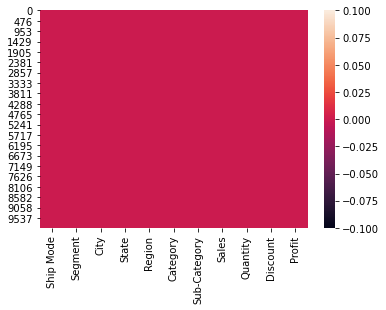

In [27]:
#Check for null value or missing value
sns.heatmap(data.isnull())

### No missing value.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [17]:
#to check for duplicate rows
data.duplicated().sum()

17

In [20]:
#Removing those duplicate rows
data.drop_duplicates(inplace=True)

In [21]:
data.shape

(9977, 13)

In [23]:

data['Country'].nunique()

1

### Since, there is only one country i.e United States in country column .it can be removed.
### also, the postal number plays no role in finding the weak areas for maximizing profits. it can also be removed.

In [25]:
data=data.drop(['Country', 'Postal Code'], axis=1)

In [26]:
data.shape

(9977, 11)

## Relationalship analysis

In [28]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


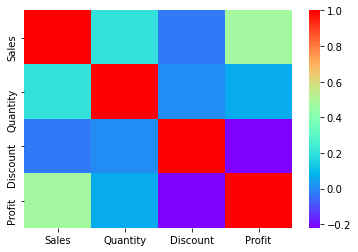

In [29]:
sns.heatmap(data.corr(),cmap='rainbow')

### No strong co-relation is found.

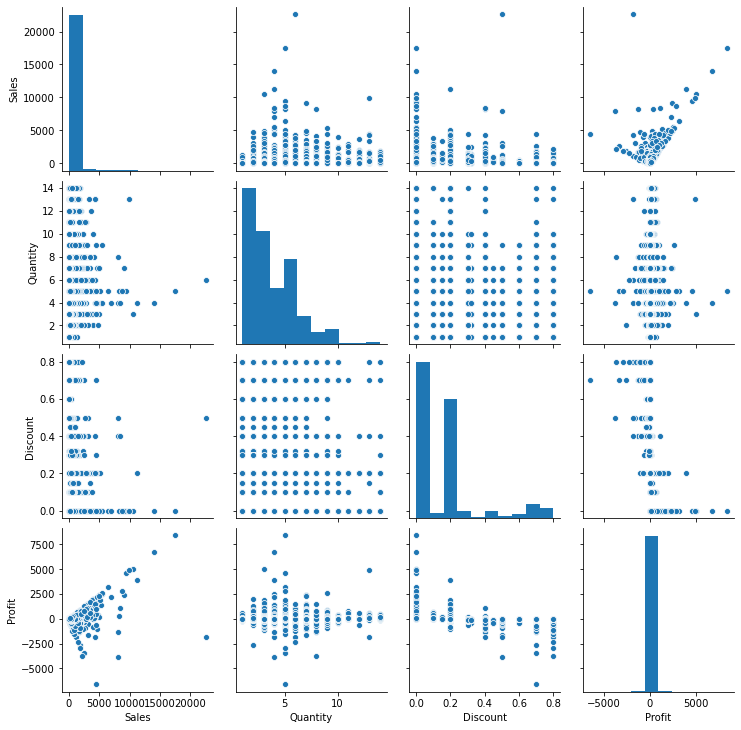

In [30]:
sns.pairplot(data)

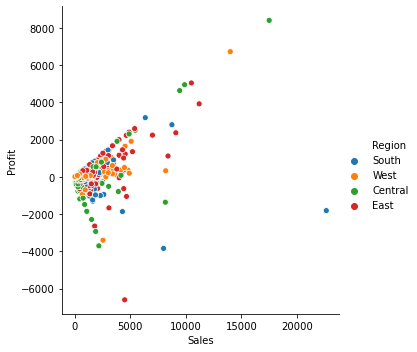

In [34]:
sns.relplot(x='Sales',y='Profit',data=data,hue='Region')

### not possible to accurately conclude with reference to above graph.

In [35]:
#Let us visualize more data.

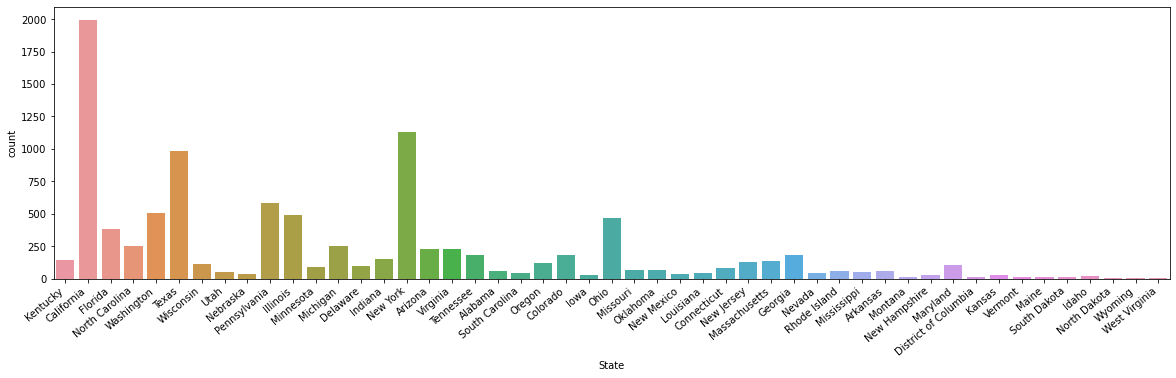

In [49]:
plt.figure(figsize=(20,5))
graph = sns.countplot('State',data=data)
graph.set_xticklabels(graph.get_xticklabels(),rotation=40,ha="right")
plt.show()

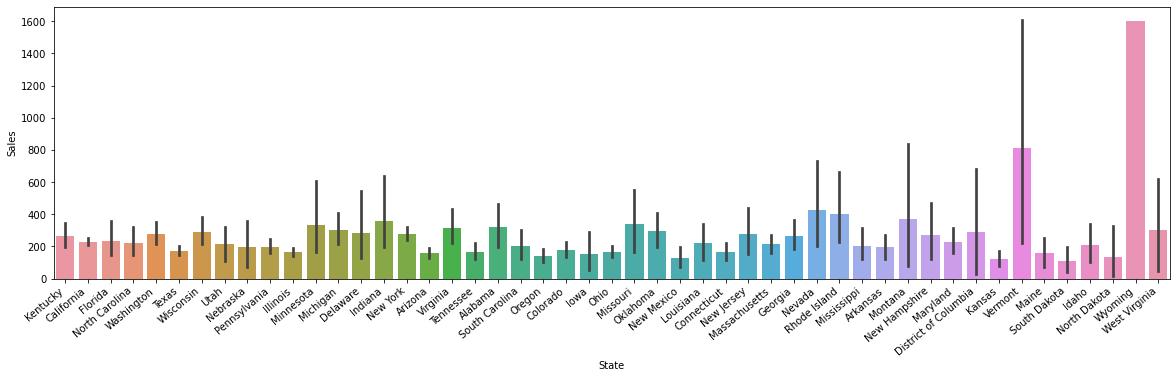

In [37]:
plt.figure(figsize=(20,5))
graph =sns.barplot(x='State',y='Sales',data=data)
graph.set_xticklabels(graph.get_xticklabels(),rotation=40,ha="right")
plt.show()

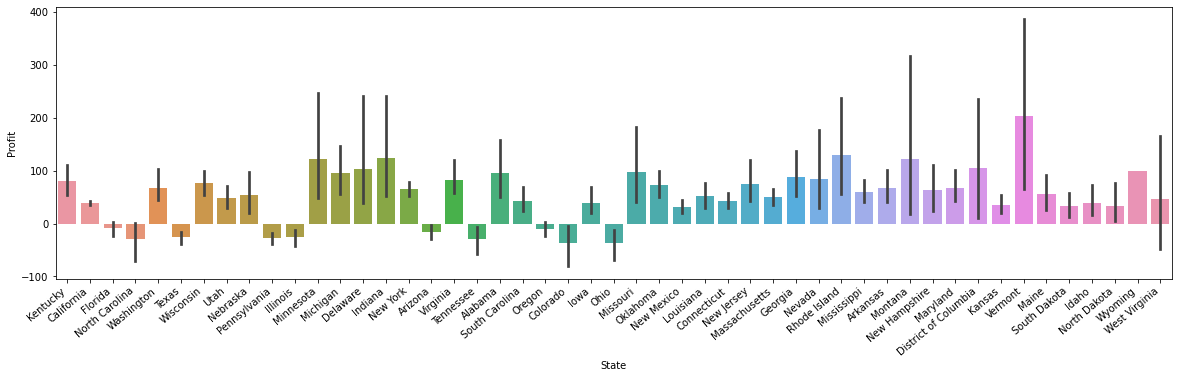

In [38]:
plt.figure(figsize=(20,5))
graph =sns.barplot(x='State',y='Profit',data=data)
graph.set_xticklabels(graph.get_xticklabels(),rotation=40,ha="right")
plt.show()

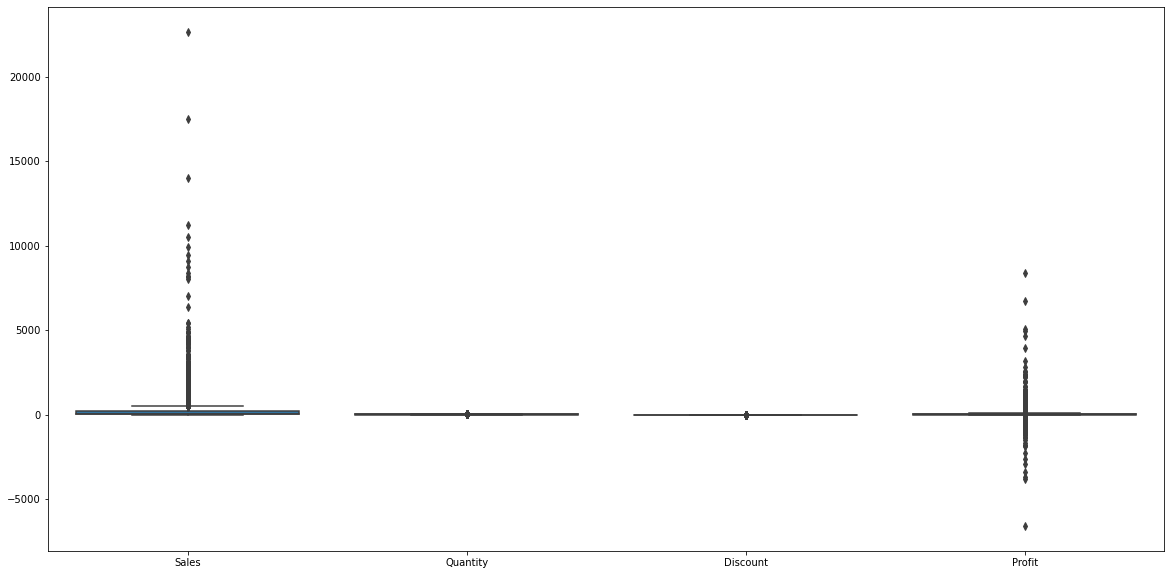

In [40]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,orient='v')
plt.show()

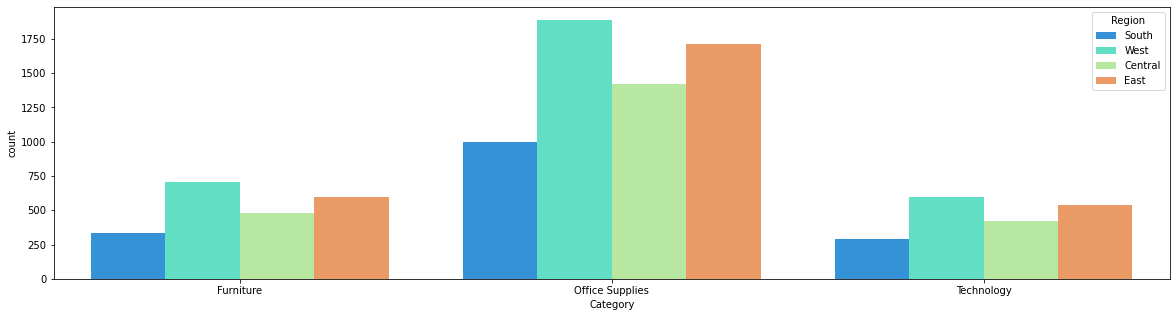

In [41]:
plt.figure(figsize=(20,5))
graph = sns.countplot('Category',hue='Region',data=data,palette='rainbow')
plt.show()

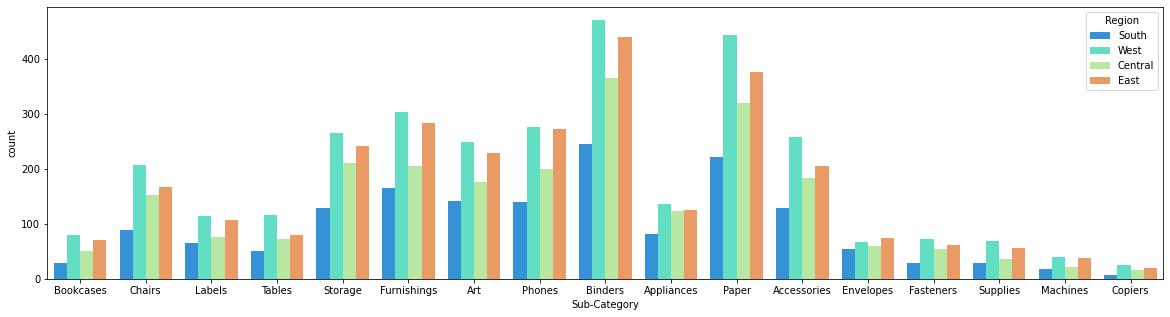

In [44]:
plt.figure(figsize=(20,5))
graph = sns.countplot('Sub-Category',hue='Region',data=data,palette='rainbow')
plt.show()

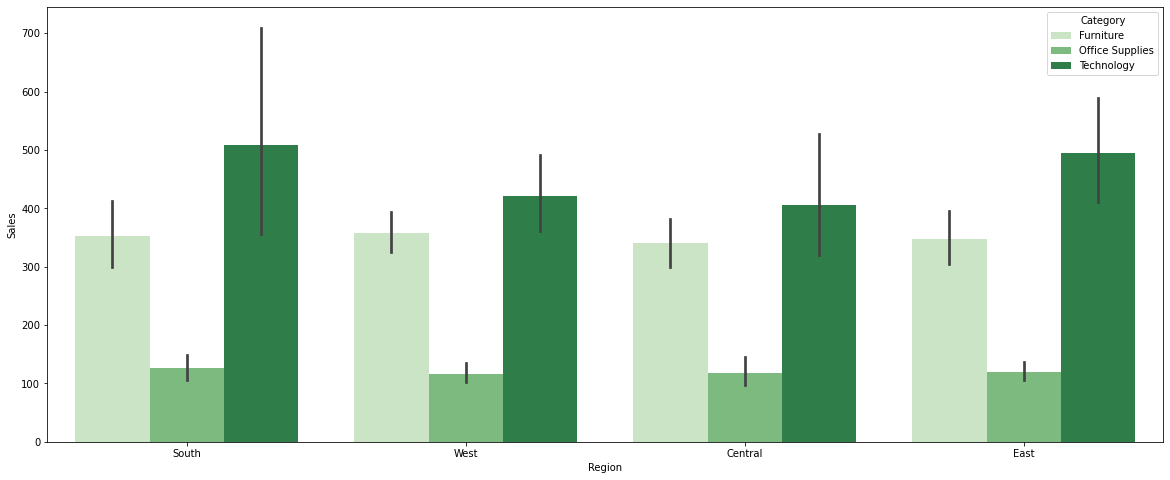

In [45]:
#Category wise sales in Each region
plt.figure(figsize=(20,8))
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=data, palette="Greens")
plt.show()

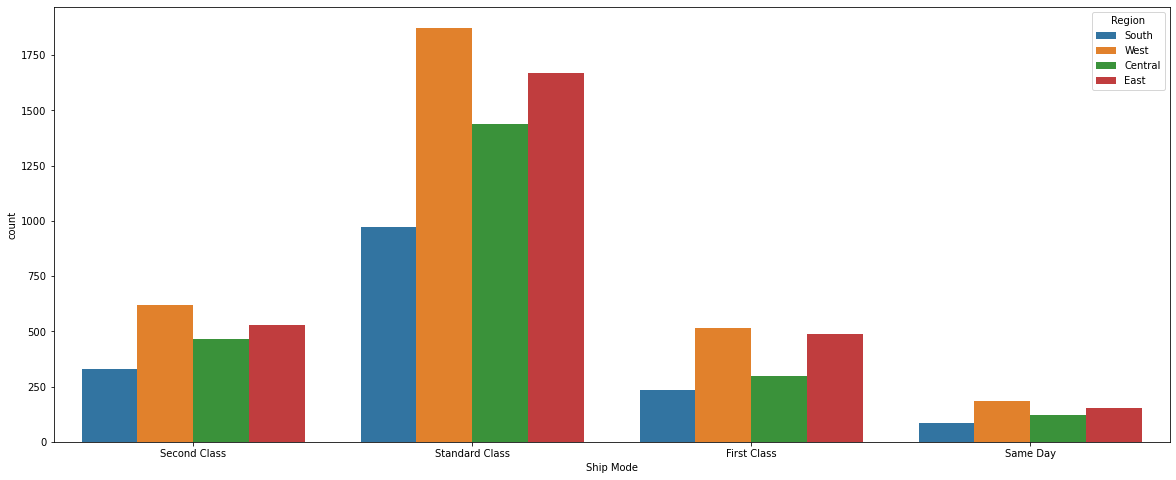

In [46]:
plt.figure(figsize=(20,8))
sns.countplot("Ship Mode", hue="Region", data=data)
plt.show()

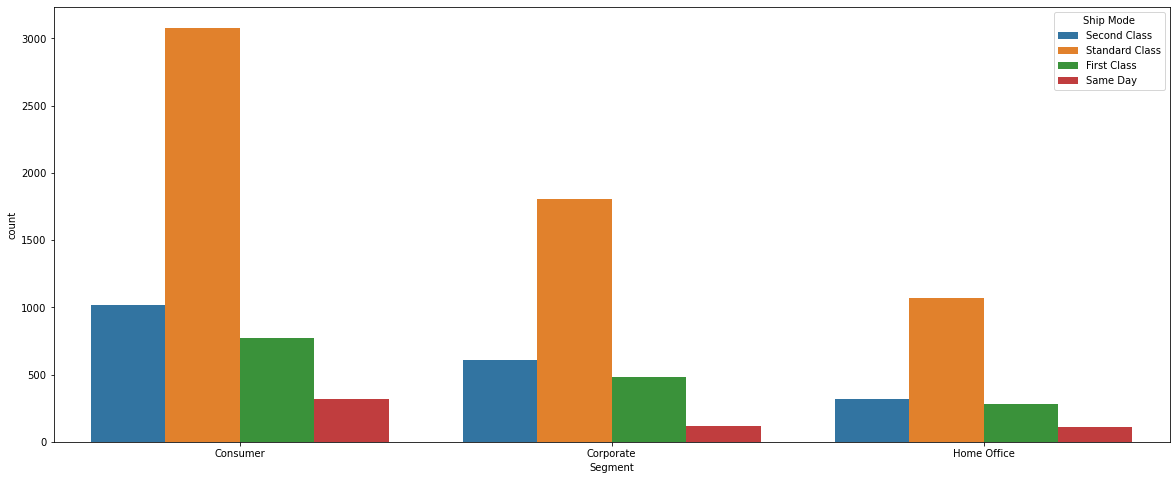

In [47]:
plt.figure(figsize=(20,8))
sns.countplot("Segment", hue="Ship Mode", data=data)
plt.show()

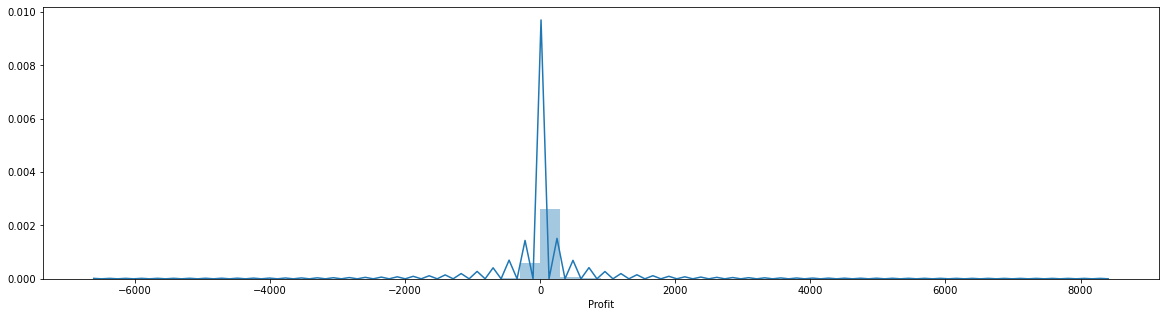

In [48]:
plt.figure(figsize=(20,5))
sns.distplot(data['Profit'])
plt.show()

<ipython-input-55-1fa07ef8372c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()


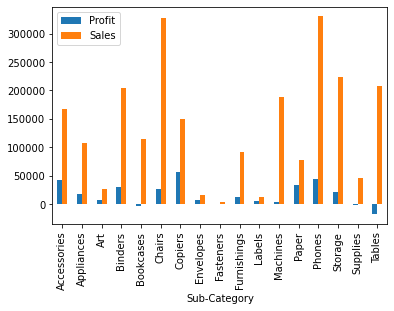

In [55]:
data.groupby('Sub-Category')['Profit','Sales'].agg(sum).plot.bar()

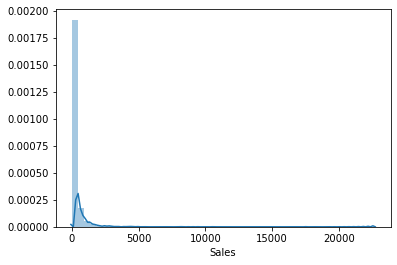

In [56]:
sns.distplot(data['Sales'])

# Conclusion
## New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit.
## In terms of category, Technology is leading in sales and profit.
## Western region and standard Class are leading in region and Ship mode features.
## we need to increase sales in NewYork and California and also try to increase in those regions which have more potential but lack due to limited sales.

# Thank you